In [74]:
import os

import IPython
import IPython.display

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from tensorflow.keras.callbacks import History
import pandas as pd
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid']=False

In [2]:
df = pd.read_csv("C:/Users/abdir/Downloads/archive (36)/electricityConsumptionAndProductioction.csv")

In [3]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36772 entries, 0 to 36771
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DateTime       36772 non-null  datetime64[ns]
 1   Consumption    36772 non-null  int64         
 2   Production     36772 non-null  int64         
 3   Nuclear        36772 non-null  int64         
 4   Wind           36772 non-null  int64         
 5   Hydroelectric  36772 non-null  int64         
 6   Oil and Gas    36772 non-null  int64         
 7   Coal           36772 non-null  int64         
 8   Solar          36772 non-null  int64         
 9   Biomass        36772 non-null  int64         
dtypes: datetime64[ns](1), int64(9)
memory usage: 2.8 MB


In [5]:
df.shape

(36772, 10)

In [6]:
df.isna().sum()

DateTime         0
Consumption      0
Production       0
Nuclear          0
Wind             0
Hydroelectric    0
Oil and Gas      0
Coal             0
Solar            0
Biomass          0
dtype: int64

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Consumption,36772.0,6707.924889,1034.961146,4081.0,5895.75,6686.0,7434.00,9615.0
Production,36772.0,6543.770478,1005.486125,3315.0,5833.00,6492.0,7210.00,9886.0
Nuclear,36772.0,1293.468590,237.348752,612.0,1349.00,1386.0,1409.00,1457.0
Wind,36772.0,785.700723,681.508967,-26.0,226.00,577.0,1195.25,2811.0
Hydroelectric,36772.0,1801.603149,678.981785,175.0,1310.00,1708.0,2184.00,4359.0
Oil and Gas,36772.0,1181.630017,422.487653,213.0,881.00,1216.0,1502.00,2141.0
Coal,36772.0,1270.038236,306.550193,279.0,1080.00,1254.0,1467.00,2537.0
Solar,36772.0,151.524094,222.768784,0.0,0.00,2.0,268.00,869.0
Biomass,36772.0,58.730828,13.363835,18.0,49.00,61.0,68.00,89.0


In [8]:
df.head()

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
1,2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2,2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
3,2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
4,2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30


In [9]:
df.tail(n=5)

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
36767,2023-03-12 19:00:00,6500,6643,1407,111,3084,933,1047,0,60
36768,2023-03-12 20:00:00,6471,6484,1408,58,2983,933,1042,0,60
36769,2023-03-12 21:00:00,6194,6413,1406,39,2938,935,1031,0,62
36770,2023-03-12 22:00:00,5708,6217,1406,8,2823,917,1001,0,61
36771,2023-03-12 23:00:00,5409,5900,1403,0,2492,914,1030,0,60


In [10]:
training_set = df.iloc[:, 1].values

In [11]:
training_set

array([6352, 6116, 5873, ..., 6194, 5708, 5409], dtype=int64)

In [12]:
df.set_index("DateTime", inplace = True)

In [13]:
com_df = df['Consumption']

array([<AxesSubplot: xlabel='DateTime'>], dtype=object)

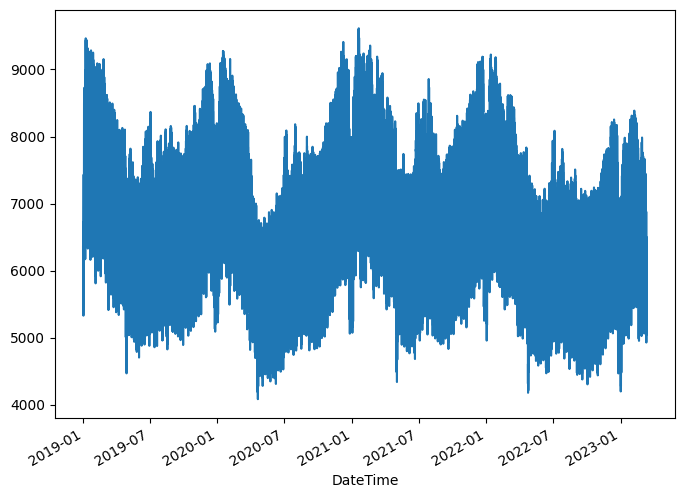

In [14]:
com_df.plot(subplots=True)

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

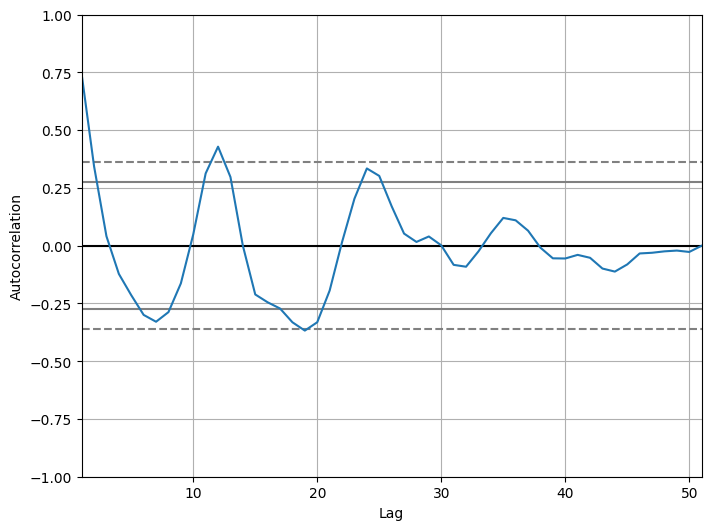

In [15]:
pd.plotting.autocorrelation_plot(df["2019": "2023"]['Consumption'].resample('1m').mean())

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

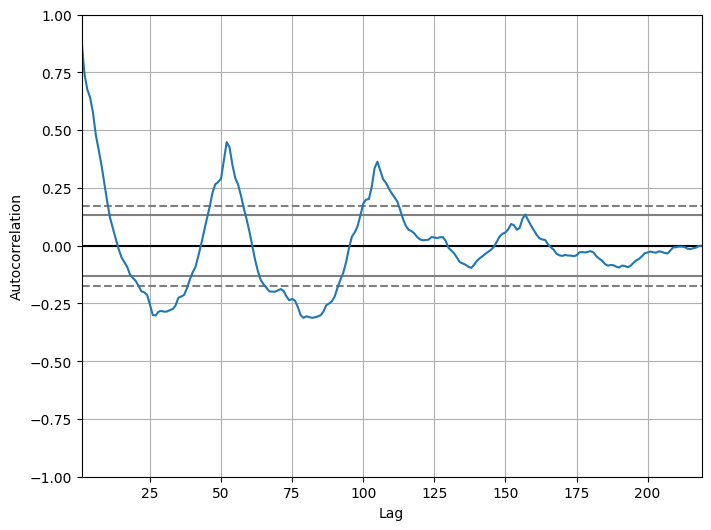

In [16]:
pd.plotting.autocorrelation_plot(df["2019": "2023"]['Consumption'].resample('1w').mean())

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

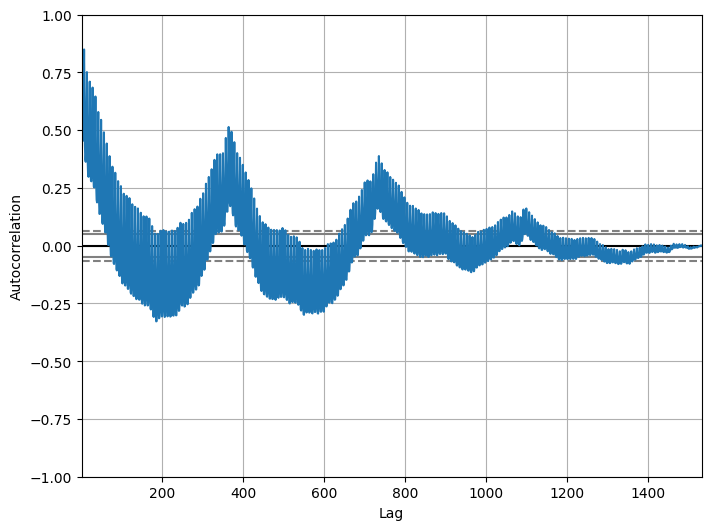

In [17]:
pd.plotting.autocorrelation_plot(df["2019": "2023"]['Consumption'].resample('1d').mean())

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

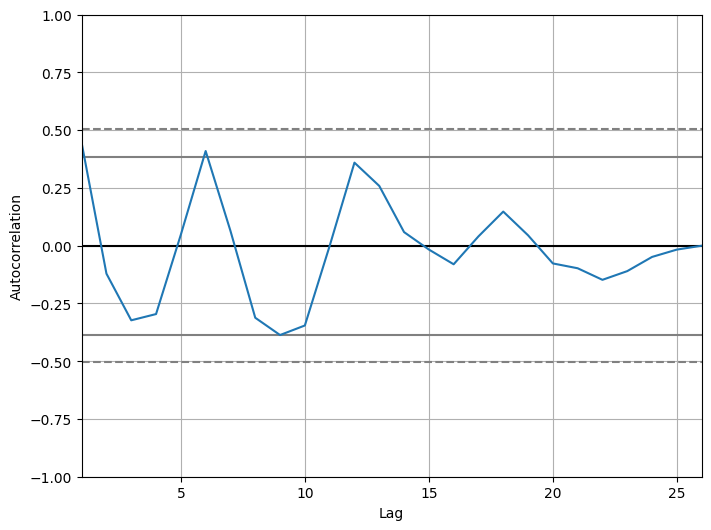

In [18]:
pd.plotting.autocorrelation_plot(df["2019": "2023"]['Consumption'].resample('2m').mean())

# Testing if the data is stationary -ie constant mean and with no trend
# Null Hypothesis (HO): Series is non-stationary, or series has a unit root.
# Alternate Hypothesis(HA): Series is stationary, or series has no unit root.

In [19]:
#USING AUGMENTED FULLER FORMULA
import statsmodels.api as sm

In [20]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
# Call the function and run the test

adf_test(df['Consumption'])

Results of Dickey-Fuller Test:
Test Statistic                -1.405559e+01
p-value                        3.121520e-26
#Lags Used                     5.300000e+01
Number of Observations Used    3.671800e+04
Critical Value (1%)           -3.430528e+00
Critical Value (5%)           -2.861619e+00
Critical Value (10%)          -2.566812e+00
dtype: float64


# USING KPSS - Kwiatkowski-Phillips-Schmidt-Shin (KPSS)
# Null Hypothesis (HO): Series is trend stationary or series has no unit root.
# Alternate Hypothesis(HA): Series is non-stationary, or series has a unit root.

In [21]:
from statsmodels.tsa.stattools import kpss

In [22]:
def kpss_test(series):
    print ('Results of KPSS Test:')
    kpsstest = kpss(series, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [23]:
kpss_test(df['Consumption'])

Results of KPSS Test:
Test Statistic            2.477383
p-value                   0.010000
#Lags Used               91.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\abdir\.anaconda\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


# The data is non-stationary

# Check  for seasonality

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

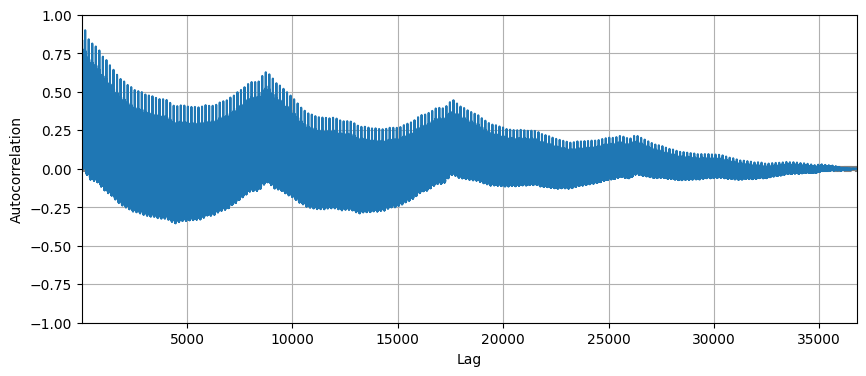

In [24]:
from pandas.plotting import autocorrelation_plot

plt.rcParams.update({'figure.figsize':(10,4), 'figure.dpi':100})
autocorrelation_plot(df['Consumption'].tolist())

# There is peakness after some lags which indicate there is seasonality

# Detecting for cyclic

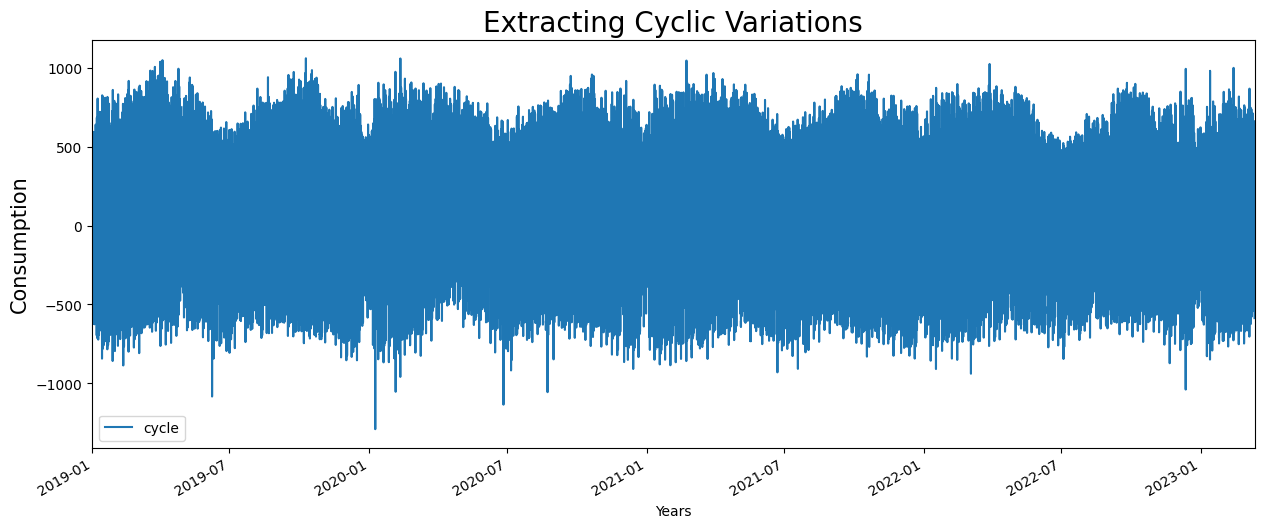

In [25]:
from statsmodels.tsa.filters.hp_filter import hpfilter
sw_cycle,sw_trend = hpfilter(df['Consumption'], lamb=100)
df['cycle'] =sw_cycle
df['trend'] =sw_trend
df[['cycle']].plot(figsize=(15,6)).autoscale(axis='x',tight=True)
plt.title('Extracting Cyclic Variations', fontsize=20)
plt.xlabel('Years')
plt.ylabel('Consumption', fontsize =15)
plt.show()

# Detecting for trend in the series

C:\Users\abdir\AppData\Local\Temp\ipykernel_6712\1844718063.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  sw_cycle,sw_trend = hpfilter(df['2019']['Consumption'], lamb=100)


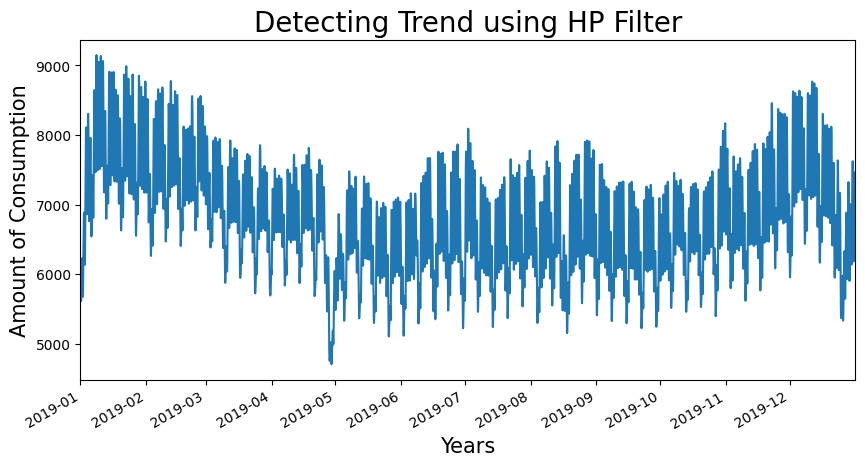

In [26]:
from statsmodels.tsa.filters.hp_filter import hpfilter
sw_cycle,sw_trend = hpfilter(df['2019']['Consumption'], lamb=100)
sw_trend.plot(figsize=(10,5)).autoscale(axis='x',tight=True) 
plt.title('Detecting Trend using HP Filter', fontsize=20)
plt.xlabel('Years', fontsize=15)
plt.ylabel('Amount of Consumption', fontsize=15)
plt.show()


# There is trend in the series

# Autocorrelation and partial-correlation

C:\Users\abdir\.anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


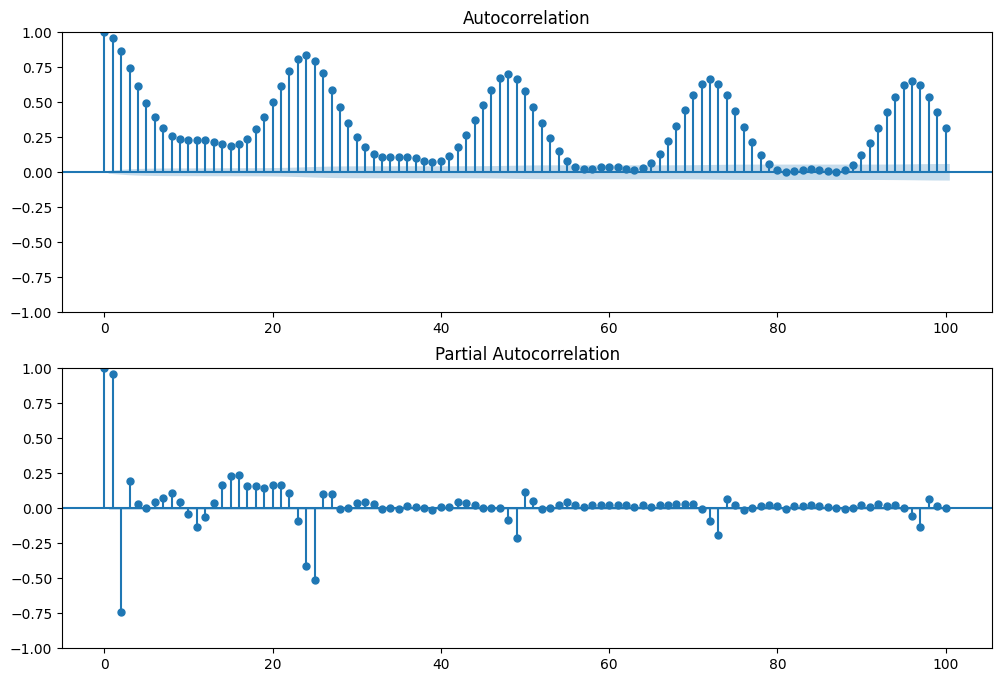

In [27]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Consumption'],lags=100,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Consumption'],lags=100,ax=ax2)

In [28]:
training_set = training_set.reshape(len(training_set), 1)

In [29]:
training_set

array([[6352],
       [6116],
       [5873],
       ...,
       [6194],
       [5708],
       [5409]], dtype=int64)

In [30]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [31]:
training_set

array([[6352],
       [6116],
       [5873],
       ...,
       [6194],
       [5708],
       [5409]], dtype=int64)

In [32]:
training_set_scaled

array([[0.41037224],
       [0.36772678],
       [0.32381641],
       ...,
       [0.38182147],
       [0.29400072],
       [0.23997109]])

In [33]:
# [[[1],[2],[3],[4],[5]]] [6]
# [[[2],[3],[4],[5],[6]]] [7]
# [[[3],[4],[5],[6],[7]]] [8]

def df_to_X_y(training_set_scaled, window_size=5):
    df_as_np = training_set_scaled
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i+5]]
        X.append(row)
        label = df_as_np[i+5]
        y.append(label)
    return np.array(X), np.array(y)
    

In [34]:
WINDOW_SIZE = 5
X, y = df_to_X_y(training_set_scaled, WINDOW_SIZE)
X.shape, y.shape

((36767, 5, 1, 1), (36767, 1))

In [35]:
x_train, y_train = X[:25000], y[:25000]
x_val, y_val = X[25000:30000], y[25000:30000]
x_test, y_test = X[30000:], y[30000:]
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((25000, 5, 1, 1),
 (25000, 1),
 (5000, 5, 1, 1),
 (5000, 1),
 (6767, 5, 1, 1),
 (6767, 1))

In [36]:
x_train

array([[[[0.41037224]],

        [[0.36772678]],

        [[0.32381641]],

        [[0.28930249]],

        [[0.26671485]]],


       [[[0.36772678]],

        [[0.32381641]],

        [[0.28930249]],

        [[0.26671485]],

        [[0.26093242]]],


       [[[0.32381641]],

        [[0.28930249]],

        [[0.26671485]],

        [[0.26093242]],

        [[0.258764  ]]],


       ...,


       [[[0.36610047]],

        [[0.34387423]],

        [[0.36212505]],

        [[0.35001807]],

        [[0.34026021]]],


       [[[0.34387423]],

        [[0.36212505]],

        [[0.35001807]],

        [[0.34026021]],

        [[0.32508132]]],


       [[[0.36212505]],

        [[0.35001807]],

        [[0.34026021]],

        [[0.32508132]],

        [[0.37188291]]]])

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

In [38]:
regressor = Sequential()

In [39]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (5, 1)))
regressor.add(Dropout(0.2))

In [40]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [41]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [42]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [43]:
regressor.add(Dense(units = 1))

In [44]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [45]:
cp = ModelCheckpoint('model1/', save_best_only=True)
regressor.compile(optimizer = 'adam', loss = MeanSquaredError(),metrics=[RootMeanSquaredError()])

In [46]:
regressor.fit(x_train, y_train, validation_data =( x_val, y_val), epochs = 10, callbacks=[cp])

Epoch 1/10
779/782 [============================>.] - ETA: 0s - loss: 0.0200 - root_mean_squared_error: 0.1413

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


782/782 [==============================] - 49s 47ms/step - loss: 0.0199 - root_mean_squared_error: 0.1412 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0571
Epoch 2/10
781/782 [============================>.] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.0668

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


782/782 [==============================] - 34s 43ms/step - loss: 0.0045 - root_mean_squared_error: 0.0668 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0406
Epoch 3/10
782/782 [==============================] - 15s 19ms/step - loss: 0.0032 - root_mean_squared_error: 0.0562 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0438
Epoch 4/10
782/782 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0511

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


782/782 [==============================] - 34s 44ms/step - loss: 0.0026 - root_mean_squared_error: 0.0511 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0352
Epoch 5/10
782/782 [==============================] - 15s 19ms/step - loss: 0.0023 - root_mean_squared_error: 0.0480 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0360
Epoch 6/10
782/782 [==============================] - 15s 19ms/step - loss: 0.0021 - root_mean_squared_error: 0.0460 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0406
Epoch 7/10
782/782 [==============================] - 15s 19ms/step - loss: 0.0020 - root_mean_squared_error: 0.0447 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0355
Epoch 8/10
782/782 [==============================] - 15s 19ms/step - loss: 0.0019 - root_mean_squared_error: 0.0439 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0391
Epoch 9/10
782/782 [==============================] - 15s 19ms/step - loss: 0.0019 - root_mean_squared_error: 0.0433 - val_loss: 0.0014 - val

In [47]:
from tensorflow.keras.models import load_model
regressor = load_model('model1/')

In [48]:
x_test.shape

(6767, 5, 1, 1)

In [49]:
x_test = x_test.reshape(len(x_test),5, 1)

In [50]:
x_test.shape

(6767, 5, 1)

In [51]:
x_test

array([[[0.47253343],
        [0.38127936],
        [0.29165161],
        [0.23762197],
        [0.20690278]],

       [[0.38127936],
        [0.29165161],
        [0.23762197],
        [0.20690278],
        [0.18792917]],

       [[0.29165161],
        [0.23762197],
        [0.20690278],
        [0.18792917],
        [0.17636429]],

       ...,

       [[0.21575714],
        [0.27177449],
        [0.37206361],
        [0.43711601],
        [0.43187568]],

       [[0.27177449],
        [0.37206361],
        [0.43711601],
        [0.43187568],
        [0.38182147]],

       [[0.37206361],
        [0.43711601],
        [0.43187568],
        [0.38182147],
        [0.29400072]]])

In [52]:
y_test = sc.inverse_transform(y_test)

In [53]:
test_predictions=regressor.predict(x_test).flatten()
test_predictions = test_predictions.reshape(len(test_predictions), 1)
# y_test = y_test.reshape(len(y_test))
test_predictions = sc.inverse_transform(test_predictions)
y_test = y_test.reshape(len(y_test))
test_predictions = test_predictions.reshape(len(test_predictions))
test_results = pd.DataFrame(data={'Test predictions': test_predictions, 'Actuals': y_test})
test_results

212/212 [==============================] - 4s 6ms/step


,Test predictions,Actuals
0,5235.882812,5121.0
1,5191.977539,5057.0
2,5161.933105,5011.0
3,5132.019043,5023.0
4,5182.885742,5402.0
...,...,...
6762,6609.179199,6500.0
6763,6785.427246,6471.0
6764,6419.896973,6194.0
6765,5975.397461,5708.0


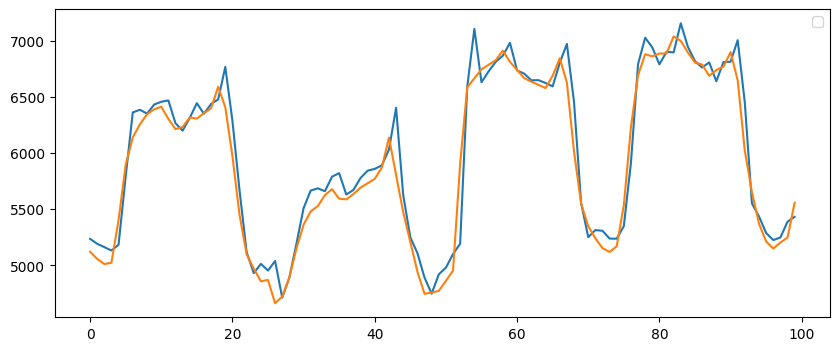

In [54]:
plt.plot(test_results['Test predictions'][:100])
plt.plot(test_results['Actuals'][:100])
plt.legend()